<a href="https://colab.research.google.com/github/Mariam-Elghazaly/Dashboard-Challenge--Medical/blob/main/clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import missingno




In [198]:
!pip install opendatasets

In [199]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/joniarroba/noshowappointments?select=KaggleV2-May-2016.csv")

Skipping, found downloaded files in "./noshowappointments" (use force=True to force download)


In [200]:
data=pd.read_csv("/content/noshowappointments/KaggleV2-May-2016.csv")

data['AppointmentDay'].sample(10)

,AppointmentDay
19799,2016-05-17T00:00:00Z
96524,2016-06-03T00:00:00Z
59786,2016-05-24T00:00:00Z
83895,2016-05-02T00:00:00Z
102539,2016-06-02T00:00:00Z
49373,2016-05-31T00:00:00Z
92663,2016-06-01T00:00:00Z
10207,2016-05-11T00:00:00Z
38296,2016-05-10T00:00:00Z
105147,2016-06-06T00:00:00Z


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<Axes: >

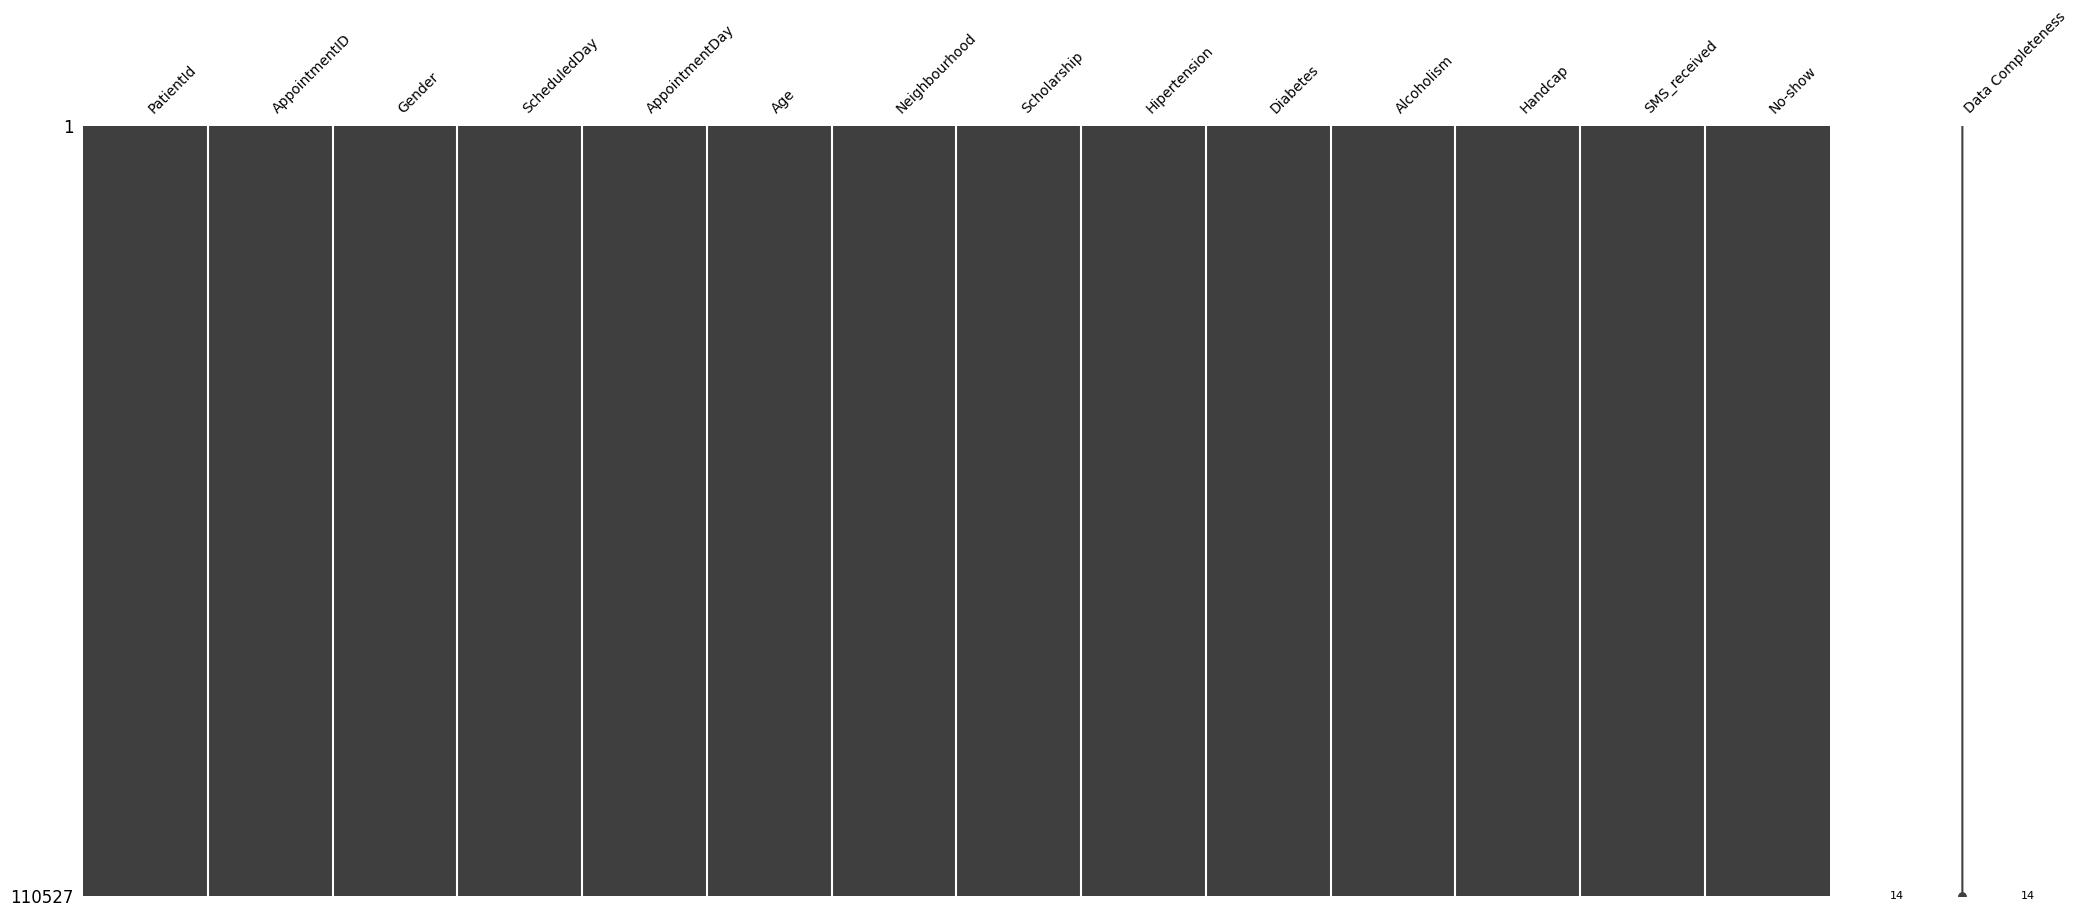

In [202]:
missingno.matrix(data, labels= True, fontsize= 10)

In [203]:
data.isna().sum()
data.nunique()


,0
PatientId,62299
AppointmentID,110527
Gender,2
ScheduledDay,103549
AppointmentDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hipertension,2
Diabetes,2


In [204]:
print(data['PatientId'].duplicated().sum())

48228


In [205]:
data['PatientId'].value_counts()

,count
PatientId,
8.221459e+14,88
9.963767e+10,84
2.688613e+13,70
3.353478e+13,65
8.713749e+14,62
...,...
7.345362e+14,1
7.812456e+13,1
5.639473e+13,1


In [206]:
data_new= data.copy()

In [207]:
visit_counts = data['PatientId'].value_counts()

# Map counts to a new column
data['No.of_Visitings'] = data['PatientId'].map(visit_counts)


In [208]:
data['No.of_Visitings'].sum()

np.int64(391335)

In [209]:
data_new=data.copy()

In [210]:
data['No.of_Visitings'] = data.groupby('PatientId')['No.of_Visitings'].transform(
    lambda x: [x.iloc[0]] + [None]*(len(x)-1)
)


In [211]:
data['No.of_Visitings'].sum()
data['No.of_Visitings']=data['No.of_Visitings'].fillna(0)






In [212]:
data["No.of_Visitings"] = data["No.of_Visitings"].astype(int)
data["No.of_Visitings"].sum()


np.int64(110527)

<Axes: >

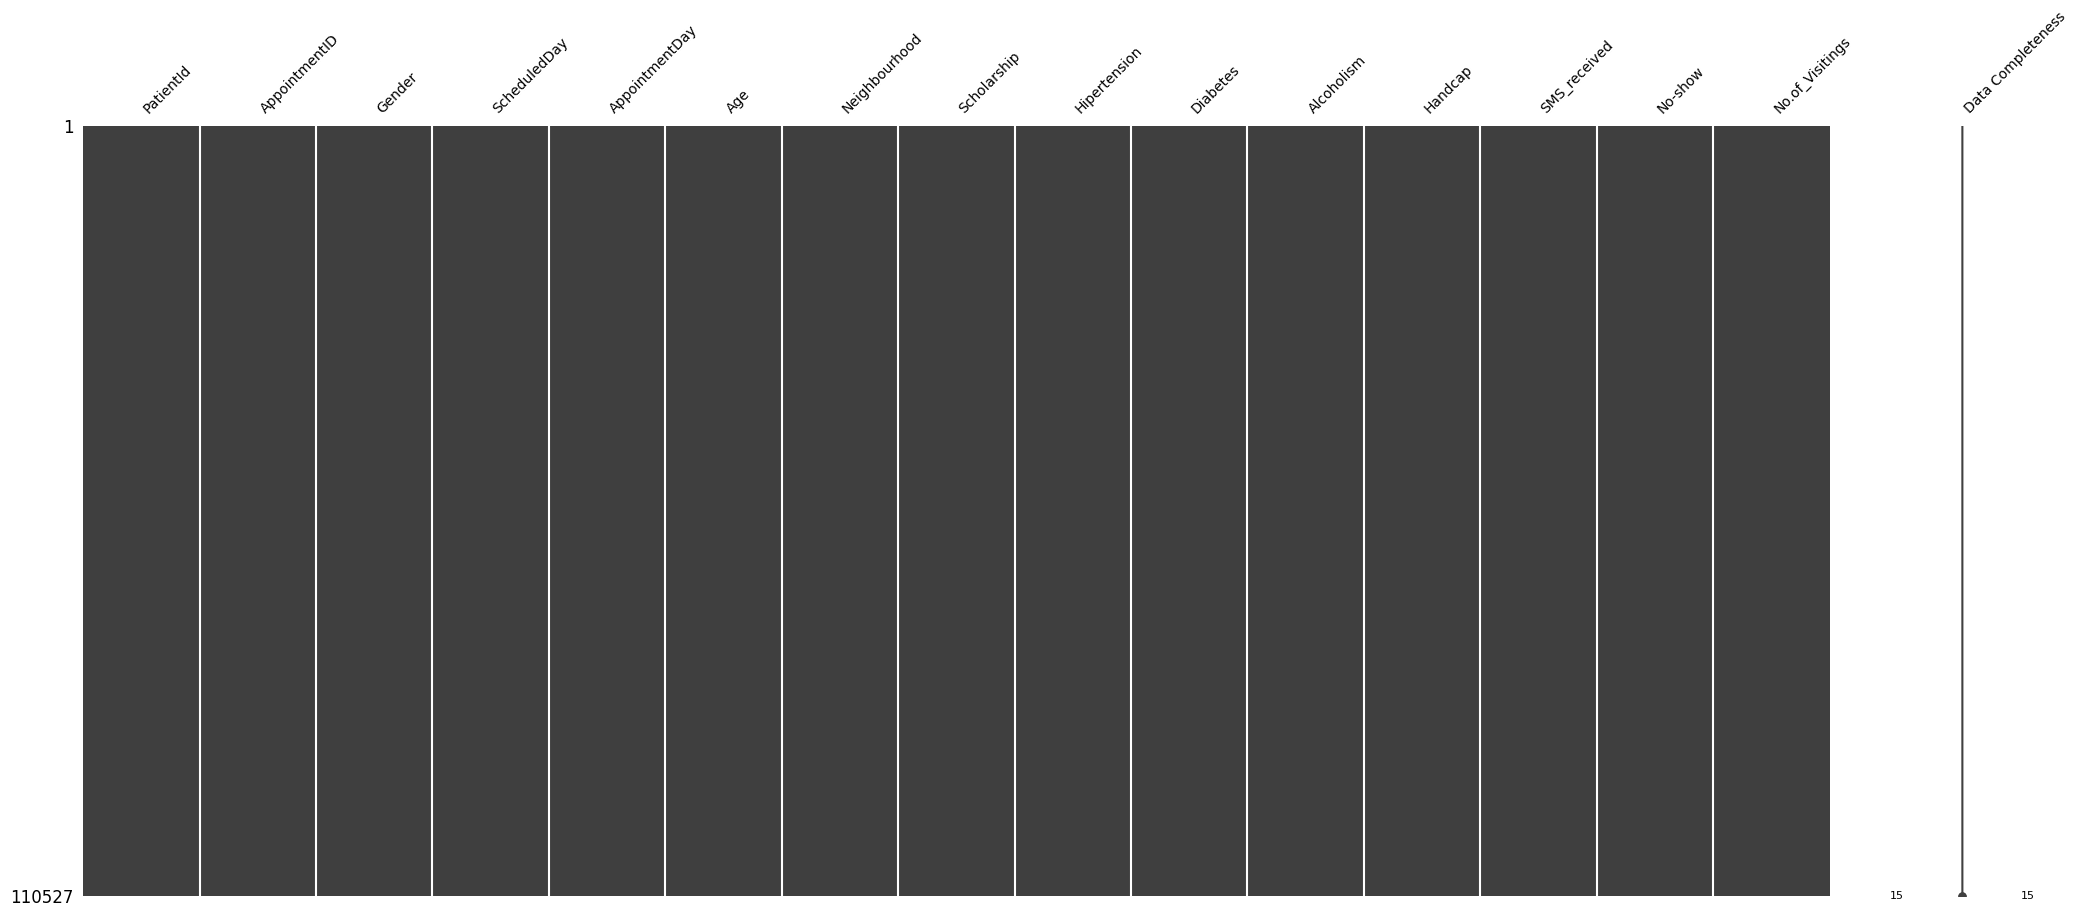

In [213]:
missingno.matrix(data, labels= True, fontsize= 10)

- After i made sure that my data has:
*   No Nulls

# I will check logic



1-Convert to string to avoid scientific notation & precision loss:

In [214]:
data[['PatientId','AppointmentID']]= data[['PatientId','AppointmentID']].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   PatientId        110527 non-null  object
 1   AppointmentID    110527 non-null  object
 2   Gender           110527 non-null  object
 3   ScheduledDay     110527 non-null  object
 4   AppointmentDay   110527 non-null  object
 5   Age              110527 non-null  int64 
 6   Neighbourhood    110527 non-null  object
 7   Scholarship      110527 non-null  int64 
 8   Hipertension     110527 non-null  int64 
 9   Diabetes         110527 non-null  int64 
 10  Alcoholism       110527 non-null  int64 
 11  Handcap          110527 non-null  int64 
 12  SMS_received     110527 non-null  int64 
 13  No-show          110527 non-null  object
 14  No.of_Visitings  110527 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 12.6+ MB


2-Convert to datetime

In [216]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'], utc=True)
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'], utc=True)




In [217]:
data['ScheduledDay_date'] = data['ScheduledDay'].dt.date
data['AppointmentDay_date'] = data['AppointmentDay'].dt.date

In [218]:
data[(data['ScheduledDay_date']> data['AppointmentDay_date'])][['PatientId','ScheduledDay','AppointmentDay','No-show']]

,PatientId,ScheduledDay,AppointmentDay,No-show
27033,7839272661752.0,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,Yes
55226,7896293967868.0,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,Yes
64175,24252258389979.0,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,Yes
71533,998231581612122.0,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,Yes
72362,3787481966821.0,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,Yes


in the context of that  appointment (when the patient should go to the doctor) → in  dataset it’s AppointmentDay
and
DataAgendamento = the day the patient scheduled/called to make the appointment → in  dataset it’s ScheduledDay.
by logic : ScheduledDay ≤ AppointmentDay
but we have a problem of ⁉

All ScheduledDay values have a time component (18:38:08, 16:08:27, etc.)

All AppointmentDay values are 00:00:00 (just the date)

ScheduledDay = 2016-04-29 18:38:08
AppointmentDay = 2016-04-29 00:00:00
Python sees ScheduledDay > AppointmentDay → True

But the patient actually booked the same day, so it’s not really an error.

so i got the date only and compared it to have the actual invlid rows where  ScheduledDay > AppointmentDay
they are 5 rows and all of them the patient didnot show up

In [219]:
data_clean = data[data['ScheduledDay_date'] <= data['AppointmentDay_date']].copy()


In [220]:
data_clean = data_clean.drop(columns=['ScheduledDay_date', 'AppointmentDay_date'])


# check gender

In [221]:
data_clean['Gender'].value_counts()

data_clean['Gender'] = data_clean['Gender'].str.strip()
data_clean['Gender'] = data_clean['Gender'].astype('category')


# age checking

In [222]:
data_clean[(data_clean['Age']<0)|(data_clean['Age']>110)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No.of_Visitings
63912,31963211613981.0,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,4
63915,31963211613981.0,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,0
68127,31963211613981.0,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes,0
76284,31963211613981.0,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No,0
97666,748234579244724.0,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No,1
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,1


I found 6 rows where might age feels unrealistic , but when i have a look , the first 4 are the same person ( patient No: 3.196321e+13) and actually , he does and show up once (appointment no: 5744037) so that might make sence that this is actually a person.

patient 7.482346e+14 have same age and also show up , so i will leave

i will only drop 99832	4.659432e+14 , age = -1(no sence)

In [223]:
data_clean = data_clean.drop(index=99832)


# Neighbourhood

In [224]:
data_clean['Neighbourhood'].value_counts()

,count
Neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4430
JARDIM DA PENHA,3877
ITARARÉ,3514
...,...
ILHA DO BOI,35
ILHA DO FRADE,10
AEROPORTO,8


In [225]:
data_clean['Neighbourhood'] = data_clean['Neighbourhood'].str.strip()
data_clean['Neighbourhood'] = data_clean['Neighbourhood'].astype('category')



#Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received

In [226]:
data_clean[['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']].nunique()

,0
Scholarship,2
Hipertension,2
Diabetes,2
Alcoholism,2
Handcap,5
SMS_received,2


- oh , headcap problem catch , because data description : Handcap True or False

In [228]:
data_clean['Handcap'].value_counts()


,count
Handcap,
0,108282
1,2239


I checked them , they looked mostly realistic , so i will only clean any headcap>1 to equal 1

In [229]:
data_clean['Handcap'] = data_clean['Handcap'].apply(lambda x: 1 if x > 1 else x)


In [230]:
data_clean['No-show'] = data_clean['No-show'].map({'Yes':1, 'No':0})
data_clean['No-show'] = data_clean['No-show'].astype('category')


In [231]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110521 non-null  object             
 1   AppointmentID    110521 non-null  object             
 2   Gender           110521 non-null  category           
 3   ScheduledDay     110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay   110521 non-null  datetime64[ns, UTC]
 5   Age              110521 non-null  int64              
 6   Neighbourhood    110521 non-null  category           
 7   Scholarship      110521 non-null  int64              
 8   Hipertension     110521 non-null  int64              
 9   Diabetes         110521 non-null  int64              
 10  Alcoholism       110521 non-null  int64              
 11  Handcap          110521 non-null  int64              
 12  SMS_received     110521 non-null  int64              
 13  No-s

In [232]:
visit_counts = data_clean['PatientId'].value_counts()

data_clean['No.of_Visitings'] = data_clean['PatientId'].map(visit_counts)

data_clean['No.of_Visitings'] = data_clean.groupby('PatientId')['No.of_Visitings'].transform(
    lambda x: [x.iloc[0]] + [None]*(len(x)-1))

data_clean['No.of_Visitings'].sum()
data_clean['No.of_Visitings']=data_clean['No.of_Visitings'].fillna(0)

data_clean["No.of_Visitings"] = data_clean["No.of_Visitings"].astype(int)
data_clean["No.of_Visitings"].sum()


np.int64(110521)

In [233]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110521 non-null  object             
 1   AppointmentID    110521 non-null  object             
 2   Gender           110521 non-null  category           
 3   ScheduledDay     110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay   110521 non-null  datetime64[ns, UTC]
 5   Age              110521 non-null  int64              
 6   Neighbourhood    110521 non-null  category           
 7   Scholarship      110521 non-null  int64              
 8   Hipertension     110521 non-null  int64              
 9   Diabetes         110521 non-null  int64              
 10  Alcoholism       110521 non-null  int64              
 11  Handcap          110521 non-null  int64              
 12  SMS_received     110521 non-null  int64              
 13  No-s

# Analysis and Makong features

- Dealy between scheduling and appointment

In [234]:
data_clean['ScheduledDay_date'] = pd.to_datetime(data_clean['ScheduledDay'])
data_clean['AppointmentDay_date'] = pd.to_datetime(data_clean['AppointmentDay'])


In [235]:
data_clean['Schedule_Delay_Days'] = (data_clean['AppointmentDay_date'] - data_clean['ScheduledDay_date']).dt.days


In [236]:
data_clean['ScheduledDay_date'] = pd.to_datetime(data_clean['ScheduledDay']).dt.date
data_clean['AppointmentDay_date'] = pd.to_datetime(data_clean['AppointmentDay']).dt.date

data_clean['Schedule_Delay_Days'] = (pd.to_datetime(data_clean['AppointmentDay_date']) -
                                     pd.to_datetime(data_clean['ScheduledDay_date'])).dt.days


In [237]:
data_clean[(data_clean['Schedule_Delay_Days'])<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No.of_Visitings,ScheduledDay_date,AppointmentDay_date,Schedule_Delay_Days


In [238]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   PatientId            110521 non-null  object             
 1   AppointmentID        110521 non-null  object             
 2   Gender               110521 non-null  category           
 3   ScheduledDay         110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay       110521 non-null  datetime64[ns, UTC]
 5   Age                  110521 non-null  int64              
 6   Neighbourhood        110521 non-null  category           
 7   Scholarship          110521 non-null  int64              
 8   Hipertension         110521 non-null  int64              
 9   Diabetes             110521 non-null  int64              
 10  Alcoholism           110521 non-null  int64              
 11  Handcap              110521 non-null  int64              
 12  SMS_rec

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,No.of_Visitings,ScheduledDay_date,AppointmentDay_date,Schedule_Delay_Days
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2,2016-04-29,2016-04-29,0
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2,2016-04-29,2016-04-29,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2,2016-04-29,2016-04-29,0
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2,2016-04-29,2016-04-29,0
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,2016-04-29,2016-04-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,0,2016-05-03,2016-06-07,35
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,0,2016-05-03,2016-06-07,35
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,1,2016-04-27,2016-06-07,41
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,0,2016-04-27,2016-06-07,41


# Day of the week for appointments (chat help)

In [249]:
data_clean['Appointment_DayOfWeek'] = data_clean['AppointmentDay'].dt.day_name()



In [250]:
data_clean['ScheduledDay_DayOfWeek'] = data_clean['ScheduledDay'].dt.day_name()


In [254]:
data_clean[['Appointment_DayOfWeek','ScheduledDay_DayOfWeek']] = data_clean[['Appointment_DayOfWeek','ScheduledDay_DayOfWeek']].astype('category')


# age grouping

- chat help

Alright, let’s break that code apart carefully so you know exactly what’s happening.

---

### **1️⃣ The `bins` list**

```python
bins = [0, 12, 18, 35, 50, 65, 100]
```

This means:

* We’re defining **boundaries** for age ranges.
* The values **must be in order** from smallest to largest.
* Think of it as "cut points" for dividing your data into buckets:

  * 0 to 12 years
  * 12 to 18 years
  * 18 to 35 years
  * 35 to 50 years
  * 50 to 65 years
  * 65 to 100 years

---

### **2️⃣ The `labels` list**

```python
labels = ['Child','Teen','Young Adult','Adult','Middle Age','Senior']
```

* These are **names** for each of the bins.
* There must be **one less label** than the number of bin edges.

  * Here: 7 bin edges → 6 intervals → 6 labels.

---

### **3️⃣ `pd.cut()`**

```python
data_clean['Age_Group'] = pd.cut(data_clean['Age'], bins=bins, labels=labels)
```

* **`pd.cut()`** takes numeric data and divides it into **intervals** based on your bin edges.
* The `labels` parameter lets you assign **human-readable names** to those intervals.
* Each value in `"Age"` gets looked at, and Pandas decides: "Which bin does this fall into?" and assigns the corresponding label.

---

### **4️⃣ Example in action**

Suppose:

```python
data_clean['Age'] = [5, 17, 28, 40, 55, 80]
```

After running the code:

```
Age  →  Age_Group
5    →  Child        (0–12)
17   →  Teen         (12–18)
28   →  Young Adult  (18–35)
40   →  Adult        (35–50)
55   →  Middle Age   (50–65)
80   →  Senior       (65–100)
```

---

### **5️⃣ Why use `pd.cut()` here?**

* Makes it easier to **group** data (e.g., compare attendance rates by age group).
* Avoids messy plots from having hundreds of unique ages.
* Human-friendly categories → easier for your dashboard users to interpret.

---

If you want, I can also show you how to make this **ordered categorical** so that “Child” comes before “Teen” in your plots instead of being sorted alphabetically. That’s usually important for dashboards. Would you like that?


In [271]:
bins = [-1, 0, 4, 12, 17, 29, 39, 49, 59, 120]
labels = ['Newborn', 'Toddler', 'Child', 'Teen', 'Young Adult',
          'Adult', 'Middle Age', 'Senior', 'Elderly']
data_clean['Age_Group'] = pd.cut(data_clean['Age'], bins=bins, labels=labels)


In [276]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   PatientId               110521 non-null  object             
 1   AppointmentID           110521 non-null  object             
 2   Gender                  110521 non-null  category           
 3   ScheduledDay            110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay          110521 non-null  datetime64[ns, UTC]
 5   Age                     110521 non-null  int64              
 6   Neighbourhood           110521 non-null  category           
 7   Scholarship             110521 non-null  int64              
 8   Hipertension            110521 non-null  int64              
 9   Diabetes                110521 non-null  int64              
 10  Alcoholism              110521 non-null  int64              
 11  Handcap                 110521 

#chronic conditions

In [282]:
data_clean['Has_Condition'] = (
    (data_clean['Hipertension'] + data_clean['Diabetes'] + data_clean['Alcoholism'] + data_clean['Handcap'])
).astype(int)


In [286]:
data_clean['Has_Condition'].value_counts()

,count
Has_Condition,
0,84111
1,18121
2,7658
3,618
4,13


In [288]:
data_clean_copy=data_clean.copy()


In [289]:
data_clean_copy=data_clean_copy.to_csv('./clean_data.csv')